    # Automatic Jupyter Notebook for OpenML dataset 150: covertype

In [1]:
%matplotlib inline
from scripts.preamble import *
did = 150
data = oml.datasets.get_dataset(did)
X, y, features = data.get_data(target=data.default_target_attribute, return_attribute_names=True)
task, topList, strats, scores = getOpenMLData(did, data.default_target_attribute) 
topList[:10] 

,flow,score
0,weka.Bagging_J48(2),0.997148
1,weka.END_ND_J48(2),0.996268
2,sklearn.ensemble.forest.RandomForestClassifier...,0.995326
3,sklearn.ensemble.forest.RandomForestClassifier...,0.995304
4,weka.RandomCommittee_RandomTree(2),0.992928
5,sklearn.ensemble.forest.RandomForestClassifier...,0.991304
6,sklearn.ensemble.forest.RandomForestClassifier...,0.991180
7,sklearn.tree.tree.DecisionTreeClassifier(22),0.954320
8,sklearn.tree.tree.DecisionTreeClassifier(22),0.954229
9,sklearn.tree.tree.DecisionTreeClassifier(22),0.954223


In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised classification problem.
Using correct task


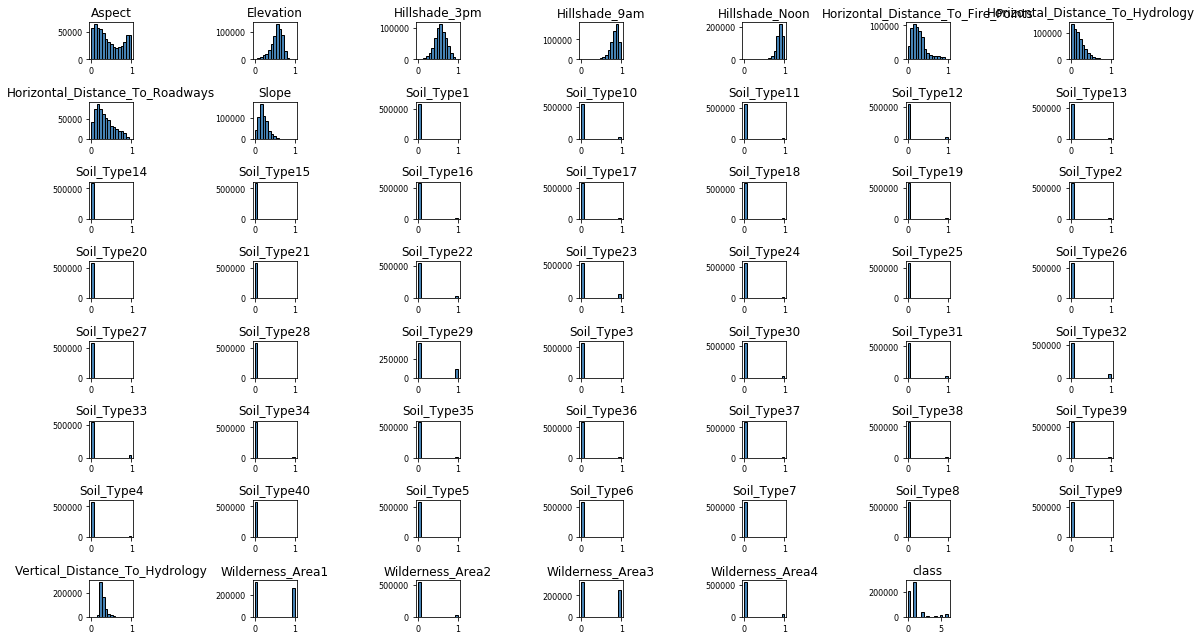

In [3]:
from scripts.dataVisualization import *
show1DHist(data) 

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,outlier
562506,0.736368,0.277778,0.5,0.472441,0.28553,0.134888,0.992126,0.692913,0.098425,0.773735,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.00816565
562332,0.738369,0.277778,0.484848,0.493916,0.286822,0.139104,0.992126,0.700787,0.106299,0.769552,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.0048923
247171,0.084542,0.275,0.681818,0.085898,0.335917,0.021076,0.96063,0.543307,0,0.047261,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.000805217
12242,0.083042,0.255556,0.69697,0.085898,0.339793,0.021076,0.940945,0.496063,0,0.050328,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00110904
248255,0.088044,0.258333,0.681818,0.088762,0.355297,0.021076,0.948819,0.515748,0,0.053534,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00122048
252522,0.064532,0.15,0.651515,0.077309,0.335917,0.021076,0.80315,0.448819,0.011811,0.075701,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00182304
3035,0.118559,0.238889,0.636364,0.042949,0.281654,0.057328,0.944882,0.53937,0,0.035689,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00187552
248277,0.068034,0.125,0.651515,0.060845,0.333333,0.015175,0.748031,0.433071,0.055118,0.050467,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00235963
2696,0.071036,0.286111,0.69697,0.064424,0.308786,0.016861,0.96063,0.543307,0,0.050328,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0027635
239734,0.089045,0.141667,0.636364,0.077309,0.332041,0.023886,0.791339,0.452756,0.035433,0.041405,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00318177


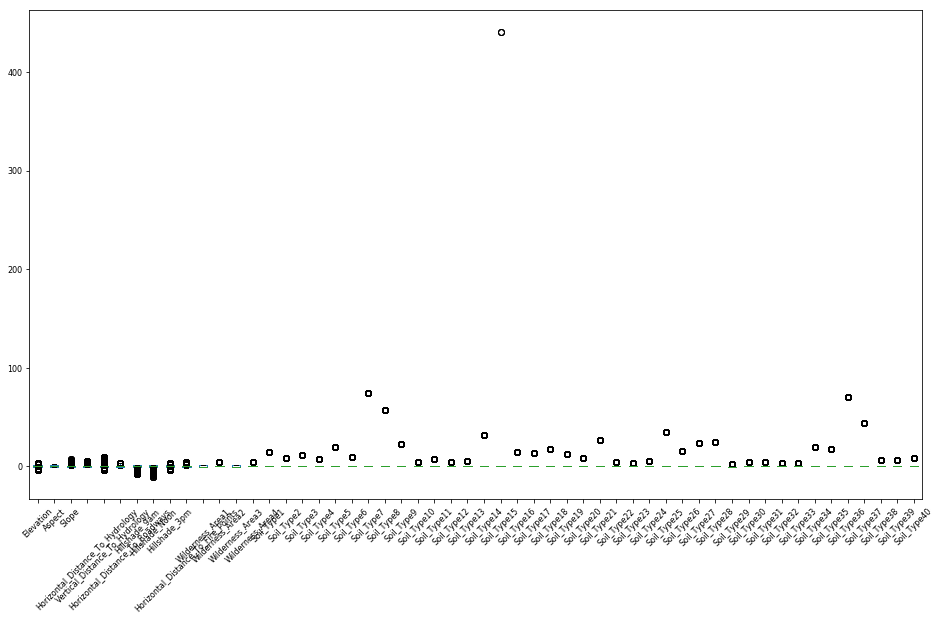

In [4]:
from scripts.outlierDetection import *
outlierDetection(X, features, 10) 

In [5]:
from scripts.localDataOpenMLInterface import *
showTopNSimilarDatasets("datasetSimilarityMatrixNormalized", did, 10) 

     did              name  similarity                             url
0    665   sleuth_case2002       0.837    https://www.openml.org/d/665
1    180         covertype       0.760    https://www.openml.org/d/180
2  40474     thyroid-allbp       0.757  https://www.openml.org/d/40474
3  40475  thyroid-allhyper       0.757  https://www.openml.org/d/40475
4  40476   thyroid-allhypo       0.757  https://www.openml.org/d/40476
5  40477    thyroid-allrep       0.757  https://www.openml.org/d/40477
6  40478       thyroid-dis       0.757  https://www.openml.org/d/40478
7     56              vote       0.737     https://www.openml.org/d/56
8    965               zoo       0.736    https://www.openml.org/d/965
9  40520       BNG(anneal)       0.735  https://www.openml.org/d/40520


Complexity threshold to determine if an algorithm will be run.


In [6]:
comp = 50000000000000

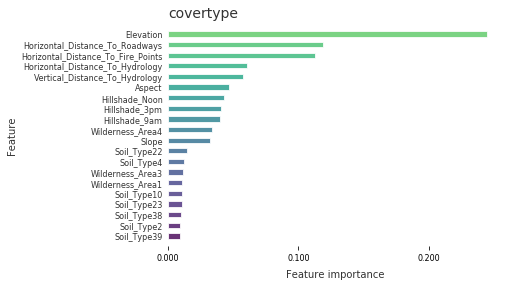

In [7]:
from scripts.featureImportance import *
featureImportance(data) 

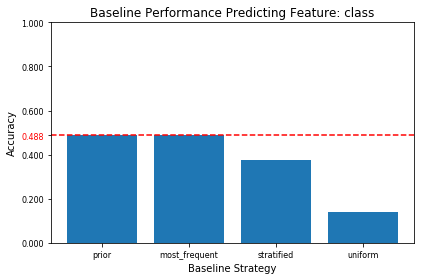

In [8]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

Please run the full notebook then toggle removeOutliers and run this cell and the next to compare the algorithms with and without outliers. 

In [12]:
removeOutliers = False

Run already exists in OpenML, WIP
Skipping run because of time limit set
Skipping run because of time limit set
Skipping run because of time limit set
Magenta colour denotes best performing algorithm when this algorithm is trained on different version of the test set.


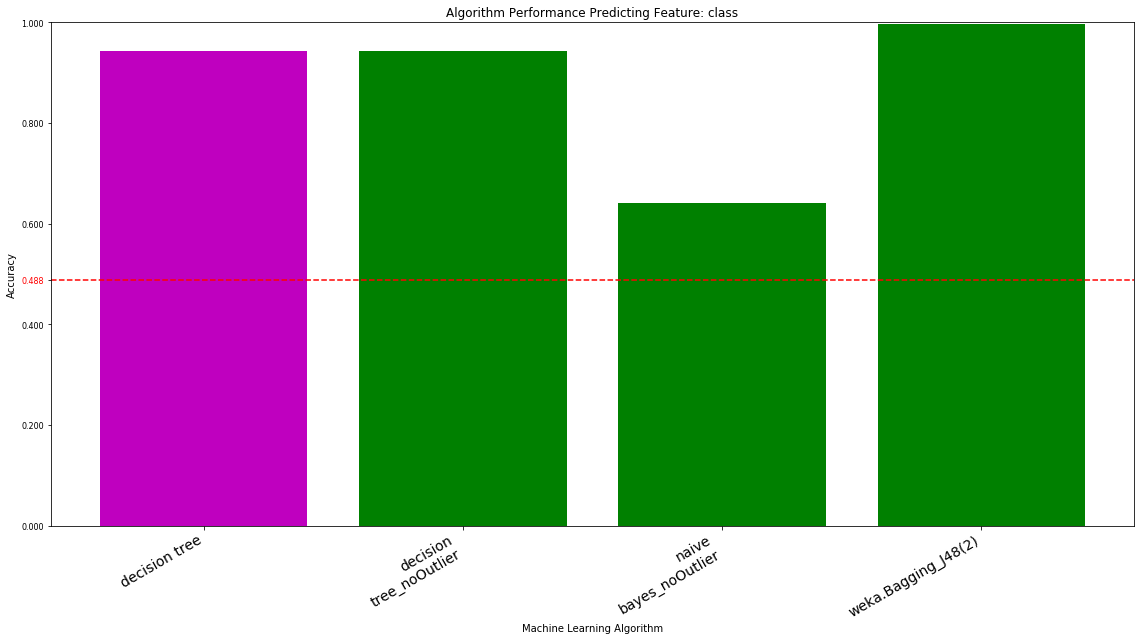

In [13]:
from scripts.machineLearningAlgorithms import *
strats = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=False, runTPOT=False, removeOutliers=removeOutliers)
plot_alg(data, strats, maxBaseline, problemType) 

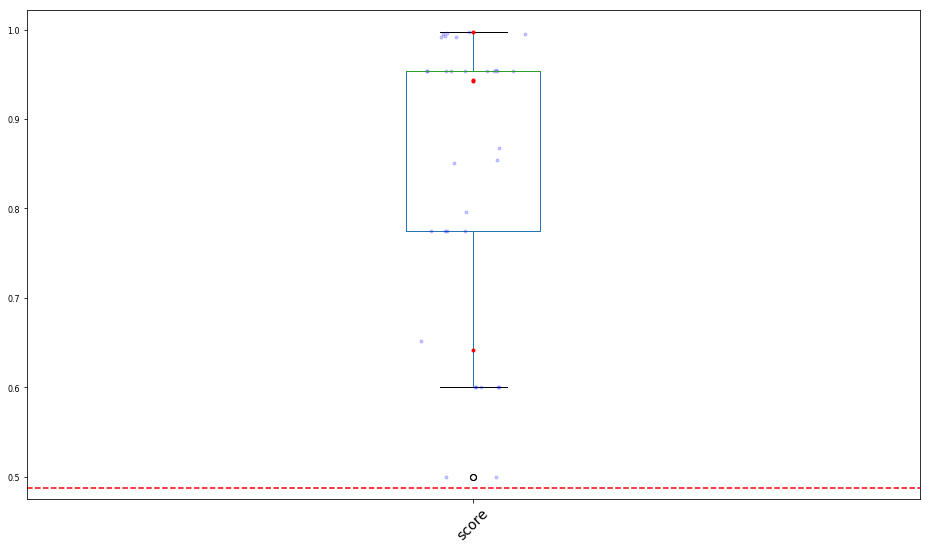

In [14]:
from scripts.relativePerformance import * 
showRelativePerformanceBoxplot(scores, topList, strats, maxBaseline) 